Water Balance Calculations. 

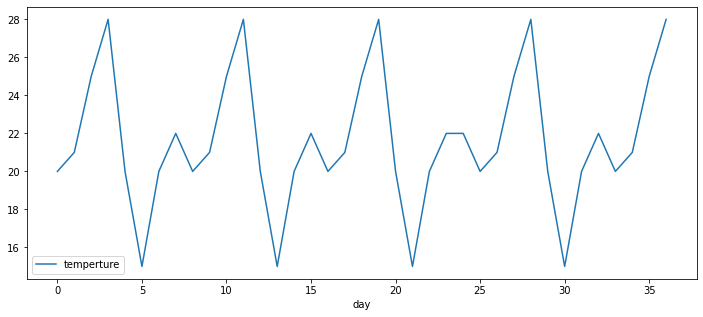

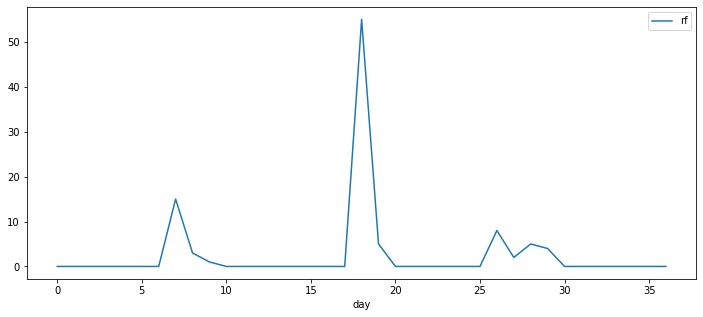

In [1]:
Location = "Durham" #@param ["Durham", "London", "Stratford-upon-Avon"]
import pandas as pd
import matplotlib.pyplot as plt

# Import the weather time series
# weather = 'https://simreaney.github.io/weather.csv'
#Chagne this part to have multiple locations in the country
#The selection then updates the soil properties  
# Intergrate in CAMELS-GB


df = pd.read_csv('https://raw.githubusercontent.com/simreaney/simreaney.github.io/master/' + Location + '.csv', na_values=['?'])
#print(df)

#make a plot of the input data
df.plot(x='day', y='temperture', kind='line', figsize=(12,5))
df.plot(x='day', y='rf', kind='line', figsize=(12,5))
plt.show()

#Calculate water balance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/l

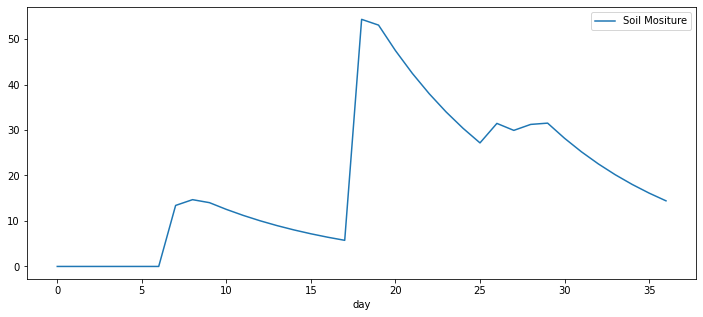

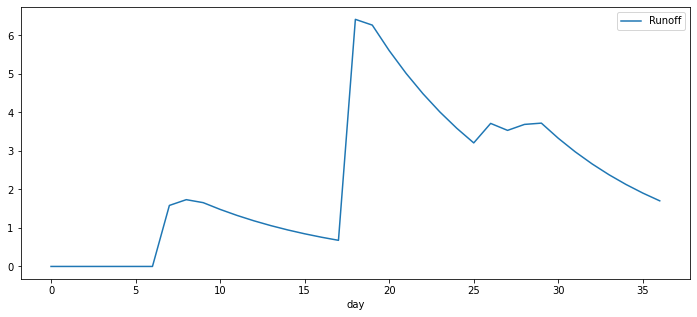

In [47]:
kSat = 88 #@param {type:"slider", min:10, max:100, step:1}
slope = 0.18 #@param {type:"slider", min:0.01, max:0.2, step:0.01}
df["Soil Mositure"] = " "
df["AET"] = " "
df["Runoff"] = " "
#define some soil properties
# kSat = 0.0005 * 24 * 60 * 60 #m day-1
#slope = 0.05
soilStore = 150 # mm
df['Runoff'][0] = 0

df['Soil Mositure'][0] = 0
for i in range(1, len(df)):

    #Infiltration of rainfall into the soil
    df['Soil Mositure'][i] = df['Soil Mositure'][i-1] + df['rf'][i]
    theta = df['Soil Mositure'][i] / soilStore
    
    #Water flow through the soil
    soilFlow = theta * kSat * slope
    df['Soil Mositure'][i] = df['Soil Mositure'][i] - soilFlow
    df['Runoff'][i] = soilFlow
    
    #Evaporation

#print(df)
#Plot the changing fluxes over time
#df.plot(x='day', y='Runoff', kind='line')
df.plot(x='day', y='Soil Mositure', kind='line', figsize=(12,5))
df.plot(x='day', y='Runoff', kind='line', figsize=(12,5))
plt.show()

Now calculate some statistics on the flows

Mean soil mositure (mm): 19.130748361155142
Total runoff (mm): 83.57296511259548


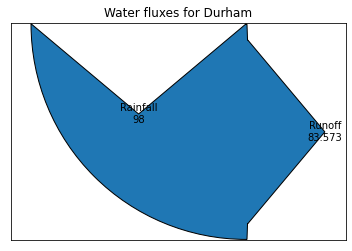

In [61]:
print('Mean soil mositure (mm): ' + str(df["Soil Mositure"].mean()))
print('Total runoff (mm): ' + str(df['Runoff'].sum()))

from matplotlib.sankey import Sankey

# basic sankey chart
Sankey(flows=[df["rf"].sum(), -df["Runoff"].sum()], labels=['Rainfall', 'Runoff'], orientations=[1, 0]).finish()
plt.title("Water fluxes for " + Location)
plt.show()

